# Image classification

In [ ]:
!pip uninstall --yes torch torchvision torchtext torchaudio
!pip install perceiver-io[image]==0.4.0
!pip install matplotlib

In [2]:
# Download checkpoints
!wget -nc -O logs.zip https://martin-krasser.com/perceiver/logs-update-5.zip
!unzip -qo logs.zip

--2022-07-21 13:10:06--  https://martin-krasser.com/perceiver/logs-update-5.zip
Resolving martin-krasser.com (martin-krasser.com)... 217.160.0.142, 2001:8d8:100f:f000::209
Connecting to martin-krasser.com (martin-krasser.com)|217.160.0.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128967640 (123M) [application/zip]
Saving to: ‘logs.zip’

logs.zip            100%[===================>] 122.99M  29.1MB/s    in 4.9s    

2022-07-21 13:10:12 (25.1 MB/s) - ‘logs.zip’ saved [128967640/128967640]



In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST
from perceiver.data.image import MNISTPreprocessor
from perceiver.model.image.classifier import LitImageClassifier

In [4]:
mnist = MNIST(root='.cache', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/train-images-idx3-ubyte.gz to .cache/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/train-labels-idx1-ubyte.gz to .cache/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/t10k-images-idx3-ubyte.gz to .cache/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting .cache/MNIST/raw/t10k-labels-idx1-ubyte.gz to .cache/MNIST/raw



In [5]:
mnist = MNIST(root='.cache', download=True, train=False)
mnist_preproc = MNISTPreprocessor()

In [6]:
ckpt_path = 'logs/exp/version_0/checkpoints/epoch=016-val_loss=0.079.ckpt'

model = LitImageClassifier.load_from_checkpoint(ckpt_path).model
model.eval();

/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [7]:
cols, rows = 3, 3
imgs = [mnist[i][0] for i in range(cols * rows)]

In [8]:
with torch.no_grad():
    logits = model(mnist_preproc.preprocess_batch(imgs))
    preds = logits.argmax(dim=1)

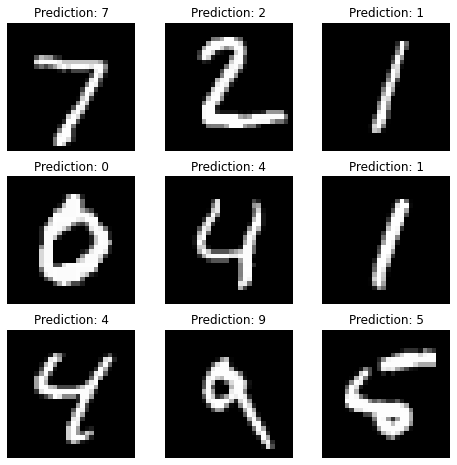

In [9]:
plt.figure(figsize=(8, 8))
for i, (img, pred) in enumerate(zip(imgs, preds)):
    plt.subplot(rows, cols, i + 1)
    plt.axis('off')
    plt.title(f'Prediction: {pred}')
    plt.imshow(np.array(img), cmap='gray')